In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent 
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
#load enviroment
load_dotenv()

True

In [23]:
import sys
sys.path.append("D:/DADuckShop/dagpt")
from src.models.llms import load_llm

MODEL_NAME = "gpt-3.5-turbo"
llm = load_llm(model_name= MODEL_NAME)
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001BB4F5C9BA0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001BB4F64D810>, root_client=<openai.OpenAI object at 0x000001BB4F3AEC10>, root_async_client=<openai.AsyncOpenAI object at 0x000001BB4F3AEFD0>, temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), max_tokens=1000)

In [24]:
llm.invoke("Hello. Who are you ?")

AIMessage(content='Hello! I am an AI digital assistant here to help you with any questions or tasks you may have. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BHtMxhFXbCfrveQHAJC21zsRslaMm', 'finish_reason': 'stop', 'logprobs': None}, id='run-9fac8ab6-86a2-430b-8d8e-e51c69e14b02-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [25]:
 
df = pd.read_csv("D:/DADuckShop/dagpt/data/raw/fashion_shop_revenue.csv")

da_agent = create_pandas_dataframe_agent(
        llm = llm,
        df = df,
        agent_type = "tool-calling",
        allow_dangerous_code = True,
        verbose = True,
        return_intermediate_steps =True,
    )
da_agent

AgentExecutor(verbose=True, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[l

In [26]:
query = "Describe this data "
response = da_agent(query)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.describe()'}`


         Quantity     Unit Price  Total Revenue
count  100.000000     100.000000   1.000000e+02
mean     2.950000  418000.000000   1.249000e+06
std      1.305582  194562.446157   8.787612e+05
min      1.000000  200000.000000   2.000000e+05
25%      2.000000  300000.000000   7.500000e+05
50%      3.000000  400000.000000   1.000000e+06
75%      4.000000  500000.000000   1.600000e+06
max      5.000000  800000.000000   4.000000e+06The data contains information about sales transactions with the following statistics:

- Quantity:
  - Count: 100
  - Mean: 2.95
  - Standard Deviation: 1.31
  - Minimum: 1
  - 25th Percentile: 2
  - Median (50th Percentile): 3
  - 75th Percentile: 4
  - Maximum: 5

- Unit Price:
  - Count: 100
  - Mean: 418,000
  - Standard Deviation: 194,562.45
  - Minimum: 200,000
  - 25th Percentile: 300,000
  - Median (50th Percentile): 400,000
  - 75th Percentile: 500,00



> Entering new AgentExecutor chain...


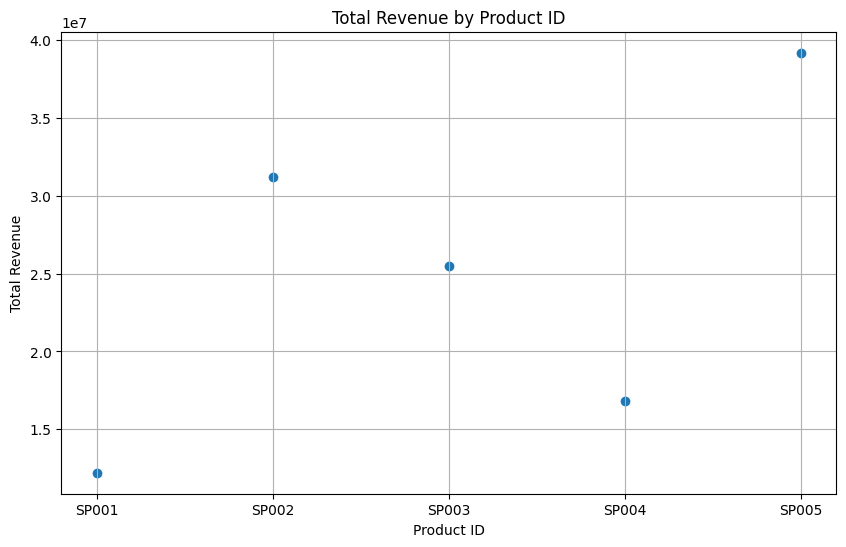


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# Grouping the data by Product ID and summing the Total Revenue\nrevenue_by_product = df.groupby('Product ID')['Total Revenue'].sum().reset_index()\n\n# Creating a scatter plot\nplt.figure(figsize=(10, 6))\nplt.scatter(revenue_by_product['Product ID'], revenue_by_product['Total Revenue'])\nplt.title('Total Revenue by Product ID')\nplt.xlabel('Product ID')\nplt.ylabel('Total Revenue')\nplt.grid(True)\nplt.show()"}`


Here is the scatter plot showing the Total Revenue by Product ID. Each point represents the sum of Total Revenue for a specific Product ID.

> Finished chain.


In [30]:
query = "plot scatter plot of Product ID and sum Total Revenue "
response = da_agent(query)